# Mínimos cuadrados lineales

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/z0ksltumd4ibyjp/mcuadrados_1.jpg?dl=0" heigth="400" width="400">

El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima. Por ejemplo:

<img src="https://dl.dropboxusercontent.com/s/z31rni7hrp6w91s/mcuadrados_2.jpg?dl=0" heigth="400" width="400">

**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

## Modelo en mínimos cuadrados lineales o también nombrados ordinarios

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de interpolación.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

Para realizar el ajuste de mínimos cuadrados se utilizan las **ecuaciones normales**: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^{n+1},
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^{m + 1}
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n+1$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

## Ejemplo: regresión lineal

En el caso de la regresión lineal se tienen dos modelos que se pueden ajustar un modelo con intercepto y otro sin él. La elección depende de los datos.

### Modelo con intercepto

Se ajusta un modelo de la forma: $f(x|\beta) = \beta_0 + \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

**Obs:** En este caso se eligen $\phi_0(x) = 1$, $\phi_1(x) =x$. Y tenemos que estimar dos parámetros: $\beta_0, \beta_1$.

### Ejemplo numérico en numpy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint

In [2]:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [3]:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

**Los datos ejemplo**

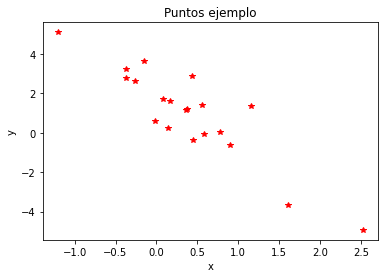

In [4]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

**El ajuste**

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar el ajuste: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

El tercer argumento de polyfit especifica el grado del polinomio a ajustar. Usaremos `ndegree = 1` pues queremos ajustar una recta.

In [6]:
x

array([-0.26,  0.09,  0.43,  0.9 ,  0.56,  0.44,  0.38, -0.15,  0.78,
       -0.02,  1.61, -0.37,  0.36,  0.17,  2.52,  0.14,  1.16,  0.59,
       -1.2 , -0.37])

In [7]:
y

array([ 2.64,  1.71,  2.91, -0.62,  1.41, -0.36,  1.22,  3.64,  0.02,
        0.59, -3.67,  3.26,  1.17,  1.61, -4.93,  0.26,  1.36, -0.04,
        5.11,  2.79])

In [8]:
ndegree = 1
coefficients = np.polyfit(x,y,ndegree)

Una vez realizado el llamado a la función polyfit se regresan los coeficientes de $x$ ordenados del mayor grado al menor.

In [9]:
pprint.pprint(coefficients)

array([-2.65,  2.03])


Entonces nuestro polinomio es: $$p_{1}(x) = -2.65x + 2.03$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 2.03$, $\hat{\beta_1} = -2.65$.

Denotamos como $\hat{y}_i$ al valor ajustado para el dato $x_i$, esto es: $\hat{y}_i = f(x_i|\hat{\beta}) = \displaystyle \sum_{j=0}^n\hat{\beta}_j\phi_j(x_i)$.

**La gráfica**

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [10]:
y_hat_numpy = coefficients[1] + coefficients[0] * x

In [11]:
y_hat_numpy

array([ 2.73,  1.8 ,  0.89, -0.35,  0.55,  0.86,  1.03,  2.43, -0.03,
        2.09, -2.23,  3.  ,  1.09,  1.58, -4.65,  1.66, -1.05,  0.47,
        5.22,  3.02])

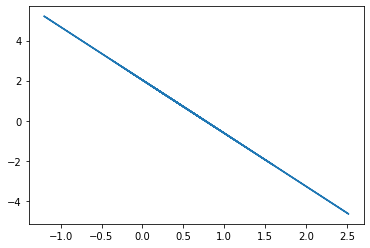

In [19]:
plt.plot(x, y_hat_numpy)
plt.show()

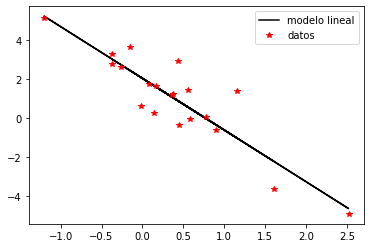

In [13]:
plt.plot(x, y_hat_numpy, 'k-',
         x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

Grafiquemos con $x's$ que no hayamos observado o medido:

In [10]:
(np.min(x),np.max(x))

(-1.2005252660472876, 2.5180237924466593)

In [11]:
mpoints_new = 30
x_new_values = np.linspace(-3,5,mpoints_new)

In [12]:
y_hat_numpy_new = coefficients[1] + coefficients[0] * x_new_values

In [13]:
y_hat_numpy_new

array([  9.99,   9.26,   8.53,   7.8 ,   7.06,   6.33,   5.6 ,   4.87,
         4.13,   3.4 ,   2.67,   1.94,   1.21,   0.47,  -0.26,  -0.99,
        -1.72,  -2.46,  -3.19,  -3.92,  -4.65,  -5.38,  -6.12,  -6.85,
        -7.58,  -8.31,  -9.05,  -9.78, -10.51, -11.24])

In [14]:
y_hat_numpy_new.shape

(30,)

In [15]:
x_new_values.shape

(30,)

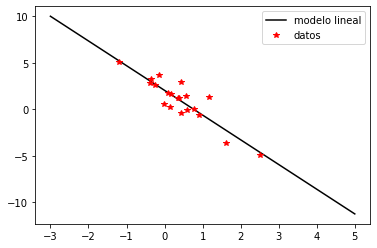

In [16]:
plt.plot(x_new_values, y_hat_numpy_new, 'k-',
         x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

In [17]:
x_new_values[x_new_values.size-1]

5.0

In [18]:
y_hat_numpy_new[y_hat_numpy_new.size-1]

-11.242432565608524

**También podemos obtener lo anterior con la factorización QR construyendo a la matriz A de forma explícita**


In [19]:
A=np.ones((mpoints,2))

In [20]:
A[:,1] = x

In [21]:
A

array([[ 1.  , -0.26],
       [ 1.  ,  0.09],
       [ 1.  ,  0.43],
       [ 1.  ,  0.9 ],
       [ 1.  ,  0.56],
       [ 1.  ,  0.44],
       [ 1.  ,  0.38],
       [ 1.  , -0.15],
       [ 1.  ,  0.78],
       [ 1.  , -0.02],
       [ 1.  ,  1.61],
       [ 1.  , -0.37],
       [ 1.  ,  0.36],
       [ 1.  ,  0.17],
       [ 1.  ,  2.52],
       [ 1.  ,  0.14],
       [ 1.  ,  1.16],
       [ 1.  ,  0.59],
       [ 1.  , -1.2 ],
       [ 1.  , -0.37]])

In [22]:
Q,R = np.linalg.qr(A)

Resolvemos el sistema $R\beta = Q^Ty$

In [23]:
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta)

array([ 2.03, -2.65])


In [24]:
y_hat_QR = A@beta

**Obs: la línea anterior es equivalente a realizar: `y_hat_QR = beta[0] + beta[1]*x`**

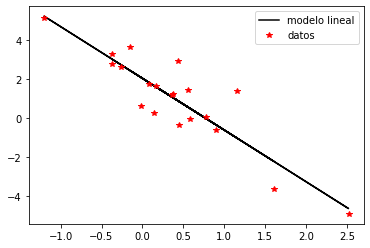

In [25]:
plt.plot(x, y_hat_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

### Modelo sin intercepto

Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

**Obs:** En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.

### Ejercicio: realizar este modelo en el laboratorio

## Una vez hecho el ajuste...

Se realiza un **análisis de residuales**, se hace una **gráfica** del modelo si las dimensiones en las que se está trabajando lo permiten y se calcula el **error cuadrático medio**.

El residual $i$ es: $r_i = y_i - \hat{y}_i$ y representa la discrepancia entre los datos y el modelo.

El error cuadrático medio se calcula como: $$ECM(\hat{y}) = \frac{1}{m} \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

$m$ es el número de puntos.

### Ejercicio: realizar el cálculo del ECM en el laboratorio para los modelos anteriores.

## Ejemplo: ajuste de un modelo por mínimos cuadrados lineales con funciones $\phi_j$'s no lineales

Obsérvese que el modelo que se ha utilizado: $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ permite elegir las $\phi_j$'s como funciones de $\mathbb{R}$ a $\mathbb{R}$. Por lo que tenemos una amplia gama de posibilidades de ajuste de curvas a datos.

Como ejemplo utilizaremos el conjunto de datos **data_for_nbook_3_minimos_cuadrados.txt** el cual lo pueden descargar en el mismo directorio de este *ipynb* o bien dando click [aquí](https://drive.google.com/file/d/1Ht7d2E1LWw7EIrrkULFQ_7-5nGVxHT4P/view?usp=sharing) y ajustaremos tres modelos de la forma:

$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$

$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$

$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

tomando como variable respuesta la segunda columna de los datos etiquetada como $y$.

In [26]:
datos = np.loadtxt('data_for_nbook_3_minimos_cuadrados.txt', skiprows=1)

ver: [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [27]:
x = datos[:,0]
y = datos[:,1]

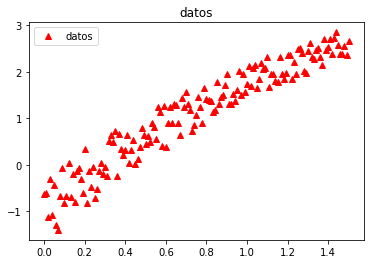

In [28]:
plt.plot(x, y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')
plt.show()

### Modelo 1

In [29]:
phi_1 = lambda var: var/(var+1)

Construimos a la matriz A como sigue:

In [30]:
mpoints, = x.shape
A=np.ones((mpoints,2))
A[:,1] = phi_1(x)

Calculamos la factorización QR y graficamos:

In [31]:
Q,R = np.linalg.qr(A)
beta = np.linalg.solve(R,Q.T@y)

In [32]:
print('beta')
pprint.pprint(beta)

beta
array([-1.3,  6.2])


In [33]:
y_hat_QR = A@beta

**Obs: que la línea anterior es equivalente a realizar: `y_hat_QR = beta[0] + beta[1]*phi_1(x)`**

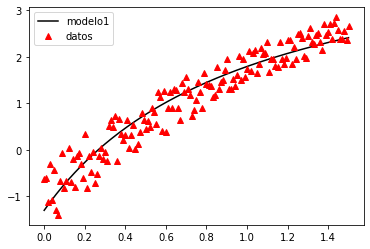

In [34]:
plt.plot(x, y_hat_QR , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')
plt.show()

### Modelo 2

No tenemos que construir A pues es un polinomio de grado 2 por lo que usamos `polyfit` de `numpy`:

In [35]:
ndegree = 2
coefficients = np.polyfit(x,y,ndegree)

In [36]:
pprint.pprint(coefficients)

array([-0.69,  3.39, -0.92])


In [37]:
y_hat_numpy = coefficients[2] + coefficients[1] * x + coefficients[0] * x**2

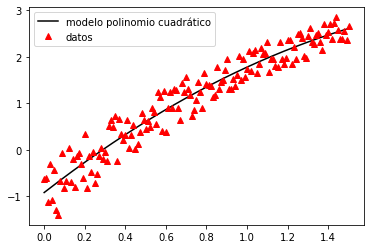

In [38]:
plt.plot(x, y_hat_numpy, 'k-',x, y, 'r^')
plt.legend(['modelo polinomio cuadrático','datos'], loc='best')
plt.show()

### Ejercicio a realizar en el laboratorio: ajustar el modelo 3. Calcular ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?